### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

### Importing dataset

In [2]:
df = pd.read_csv("Iris Dataset.csv")

### Analyzing the dataset

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.shape

(150, 6)

### Data visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


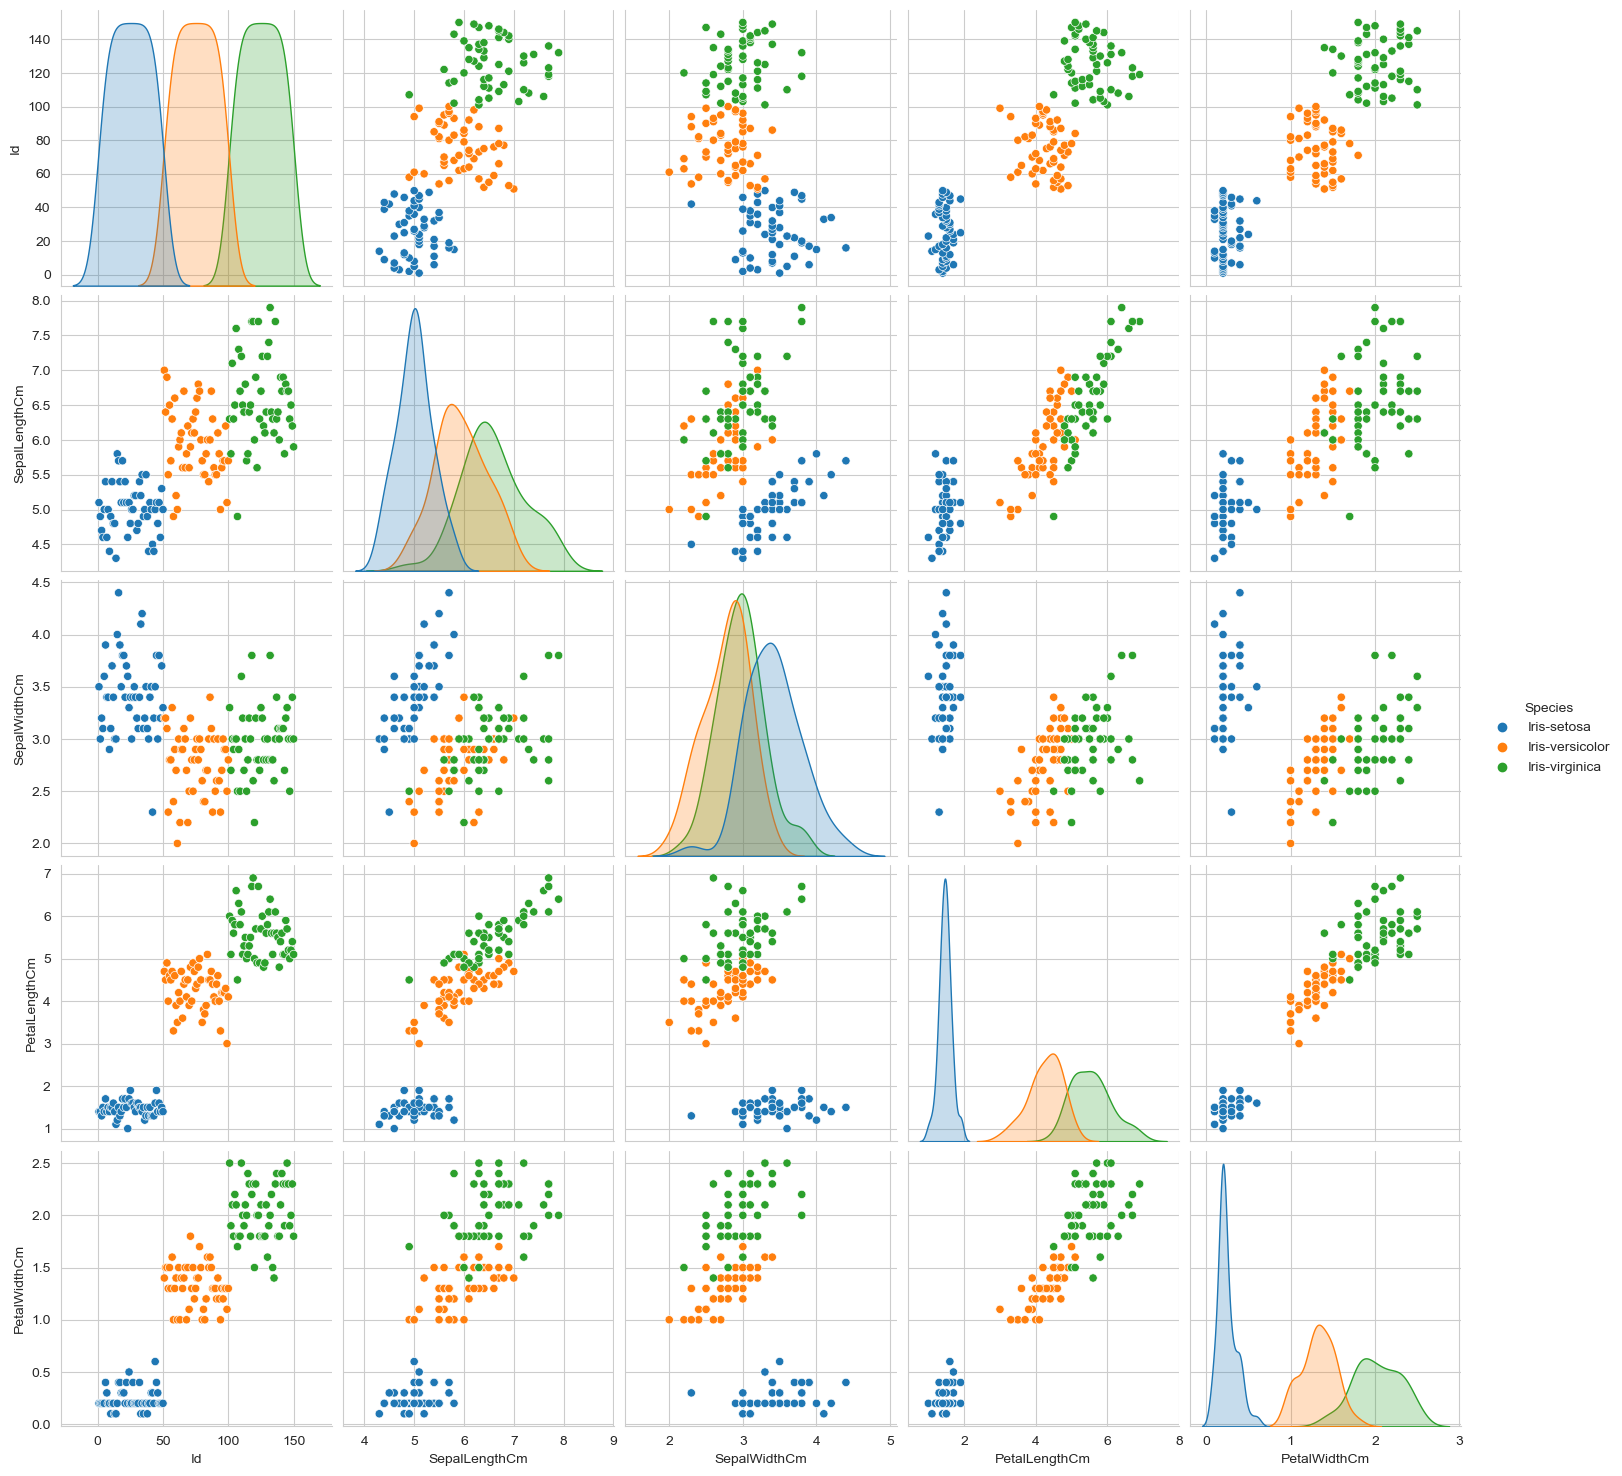

In [8]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species", size=3);
plt.show()

### Data pre-processing

In [9]:
#dropping id column - useless
df=df.drop(["Id"],axis=1)

In [10]:
#encoding species column

data = [df]
for d in data:
    d.loc[ d['Species'] == 'Iris-setosa', 'Species'] = 0
    d.loc[ d['Species'] == 'Iris-versicolor', 'Species'] = 1
    d.loc[ d['Species'] == 'Iris-virginica', 'Species'] = 2

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splitting the dataset

In [12]:
X = df.drop(["Species"],axis=1)
y = df["Species"]

In [13]:
X = X.to_numpy()
y = y.to_numpy()

### Model building

In [14]:
#Place K centroids at random locations
def random_centroids(all_vals, K):    
    centroids = []
    for i in range(K):
        centroid = all_vals[rand.randint(0, 149)]
        centroids.append(centroid)
    return centroids

In [15]:
#Assign all data points to the closest center
def assign_cluster(all_vals, centroids):
    assignments = []

    for data_point in all_vals:
        dist_point_clust = []

        for centroid in centroids:
            d_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
            dist_point_clust.append(d_clust)
        
        assignment = np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments

In [16]:
#Compute the new centroids as the mean of all points in the cluster
def new_centroids(all_vals, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(all_vals)):
                if (assignments[x] == i):
                    pt_cluster.append(all_vals[x])
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)

    return new_centroids

In [17]:
#Compute SSE for stopping criteria
def sse(all_vals, assignments, centroids):
    errors = []
    
    for i in range(len(all_vals)):
        #get assigned centroid for each point
        centroid = centroids[assignments[i]]
    
        #compute the distance (error) between one point and its closest centroid
        error = np.linalg.norm(np.array(all_vals[i]) - np.array(centroid))
        
        #append squared error to the list of error
        errors.append(error**2)
        
    #and sum up all the errors
    sse = sum(errors)
    
    return sse

In [18]:
#Given a set of assignments of points to clusters, compute the new centroids for every cluster, 
#by taking the mean of all the points assigned to each cluster.

def kmeans_clustering(all_vals,K,max_iter = 100, tol = pow(10,-3) ):
    it = -1
    all_sse = []
    assignments = []
    
    #Place K centroids at random locations
    centroids = random_centroids(all_vals, K)
   
    #Until algorithm converges (needs two iterations before comparing the errors)
    while (len(all_sse)<=1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] >= tol)):
        it += 1
        #Assign all data points to the closest center
        assignments = assign_cluster(all_vals, centroids)
        
        #Compute the new centroids
        centroids = new_centroids(all_vals, centroids, assignments, K)
        
        #Compute SSE
        sse_kmeans = sse(all_vals, assignments, centroids)
        all_sse.append(sse_kmeans)        
        
     
    return (assignments, centroids, all_sse, it+1)

In [29]:
result= kmeans_clustering(X,K=3)

In [20]:
print("Centroids\n",result[1])

Centroids
 [array([6.85      , 3.07368421, 5.74210526, 2.07105263]), array([5.006, 3.418, 1.464, 0.244]), array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097])]


In [21]:
print("Sum of squared error\n",result[2])

Sum of squared error
 [253.45553650499426, 128.6507929242949, 80.23697727926374, 78.94084142614601, 78.94084142614601]


### Visualization

In [22]:
centroids_x = [result[1][x][0] for x in range(len(result[1]))] #sepal_length: [0] 
centroids_y = [result[1][x][2] for x in range(len(result[1]))] #petal_length: [2]

In [23]:
x = df['SepalLengthCm']
y = df['PetalLengthCm']
assignments = result[0]

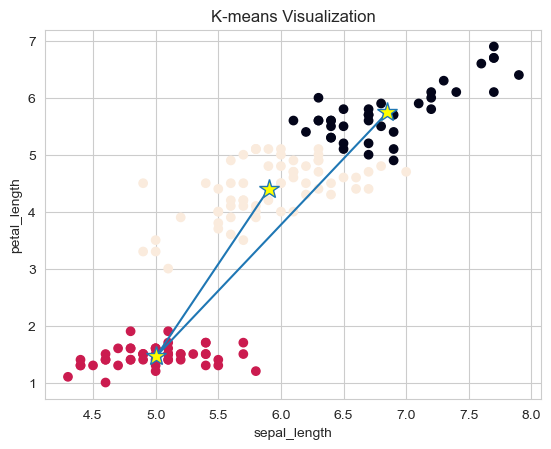

In [27]:
plt.scatter(x, y, c=assignments)
plt.plot(centroids_x,centroids_y, marker='*', markerfacecolor='yellow', markersize=15)

plt.title("K-means Visualization")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

# PCA

In [25]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)
        print("Covaraince : ",cov)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)
        print("\nEigen values : ",eigenvalues)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T
        print("\nEigen Vectors : ",eigenvectors)

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)

Covaraince :  [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

Eigen values :  [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]

Eigen Vectors :  [4.22484077 0.24224357 0.07852391 0.02368303]

X Projected :  [[ 1.49534809e+00 -4.77316221e+00 -1.02129154e+01]
 [-6.65521012e-01 -4.81716076e+00 -1.02732056e+01]
 [ 1.23146037e-01 -4.83041695e+00 -1.07394018e+01]
 [-3.07857616e-01 -4.79218893e+00 -9.92102631e+00]
 [ 1.89360781e+00 -4.76767812e+00 -1.02347714e+01]
 [ 3.28625124e+00 -3.81700651e+00 -8.84761210e+00]
 [ 9.54110527e-01 -4.37037203e+00 -1.03285531e+01]
 [ 1.05649204e+00 -4.75915854e+00 -9.81702398e+00]
 [-1.20912687e+00 -4.83685467e+00 -1.03966957e+01]
 [-2.37552847e-01 -5

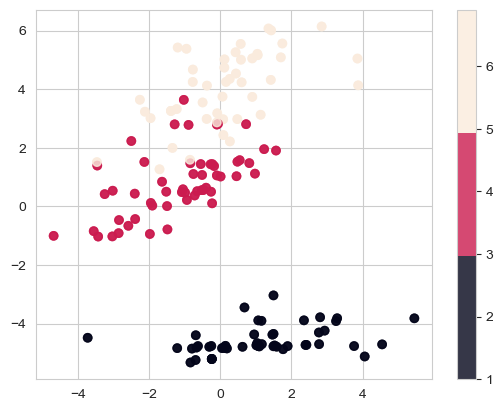

In [35]:
# Testing
if __name__ == "__main__":

    # Project the data onto the 3 primary principal components
    pca = PCA(3)
    pca.fit(X)
    X_projected = pca.transform(X)
    print("\nX Projected : ",X_projected)

    print("\nShape of X:", X.shape)
    print("\nShape of transformed X:", X_projected.shape)

    x1 = X_projected[:, 0]
    x2 = X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, alpha=0.8, cmap=plt.cm.get_cmap("rocket", 3)
    )
    
    plt.colorbar()
    plt.show()